<a href="https://colab.research.google.com/github/robinhester/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  #True Positive Rate 
  true_positive_rate = true_positive_rate
  #Prior Probability
  prob_drunk_prior=prob_drunk_prior
  #False Positive Rate
  false_postive_rate=false_positive_rate
  #1-prior (compliment of our prior)
  p_non_drunk=1-prob_drunk_prior
  #numerator
  n=true_positive_rate*prob_drunk_prior
  #denominator
  d=(true_positive_rate*prob_drunk_prior)+(false_positive_rate)*(p_non_drunk)
  return n/d

In [0]:
#1st time
# 1.23 %
prob_drunk_given_positive(1/1000,.08,1.0)

0.012357884330202669

In [0]:
#2nd time
# 13.5%
prob_drunk_given_positive(0.01235,.08,1.0)

0.13517655042577878

In [0]:
#3rd time
# 66%
prob_drunk_given_positive(.13518,.08,1.0)

0.6614616158492428

In [0]:
#4th time
# >95%
prob_drunk_given_positive(.66146,.08,1.0)

0.9606659393339445

Experiment and create a visualization

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-02-19 21:25:15--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.1’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-02-19 21:25:16 (286 KB/s) - ‘house-votes-84.data.1’ saved [18171/18171]



In [0]:
votes = pd.read_csv('house-votes-84.data', names=['party','handicapped_infants','water_project',
                          'budget','physician_fee_freeze', 'el_salvador_aid',
                          'religious_groups','anti_satellite_ban',
                          'aid_to_contras','mx_missile','immigration',
                          'synfuels', 'education', 'right_to_sue','crime','duty_free',
                          'south_africa'])
votes.head()

,party,handicapped_infants,water_project,budget,physician_fee_freeze,el_salvador_aid,religious_groups,anti_satellite_ban,aid_to_contras,mx_missile,immigration,synfuels,education,right_to_sue,crime,duty_free,south_africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
votes = votes.replace({"y": 1, "n": 0, "?": np.NaN})


In [0]:
rep = votes[votes['party']=='republican']

rep.head()

,party,handicapped_infants,water_project,budget,physician_fee_freeze,el_salvador_aid,religious_groups,anti_satellite_ban,aid_to_contras,mx_missile,immigration,synfuels,education,right_to_sue,crime,duty_free,south_africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [0]:
dem = votes[votes['party']=='democrat']

dem.head()

,party,handicapped_infants,water_project,budget,physician_fee_freeze,el_salvador_aid,religious_groups,anti_satellite_ban,aid_to_contras,mx_missile,immigration,synfuels,education,right_to_sue,crime,duty_free,south_africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [0]:
mask=np.isnan(dem.budget)
dem.budget[mask]=0.0
dem.budget.isnull().sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


0

In [0]:
def confidence_interval(data, confidence=.95):
  n = len(data)
  mean = sum(data)/n
  data = np.array(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n-1)
  return (mean-interval, mean, mean+interval)

In [0]:
CI,_,_=stats.bayes_mvs(dem.budget, alpha=.95,)
CI

Mean(statistic=0.8651685393258427, minmax=(0.8239366017405851, 0.9064004769111003))

In [0]:
confidence_interval(dem.budget)

(0.8239366017405851, 0.8651685393258427, 0.9064004769111003)

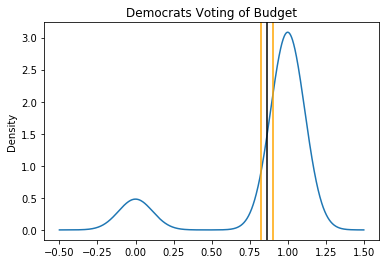

In [0]:
con_int = confidence_interval(dem.budget)

dem.budget.plot.density()
plt.title("Democrats Voting of Budget")
plt.axvline(x=con_int[0], color='orange')
plt.axvline(x=con_int[1], color='black')
plt.axvline(x=con_int[2], color='orange');
plt.show()

In [0]:
mask=np.isnan(rep.budget)
rep.budget[mask]=0.0
rep.budget.isnull().sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


0

In [0]:
CI,_,_=stats.bayes_mvs(rep.budget, alpha=.95,)
CI

Mean(statistic=0.13095238095238096, minmax=(0.07941444662385228, 0.18249031528090964))

In [0]:
confidence_interval(rep.budget)

(0.07941444662385228, 0.13095238095238096, 0.18249031528090964)

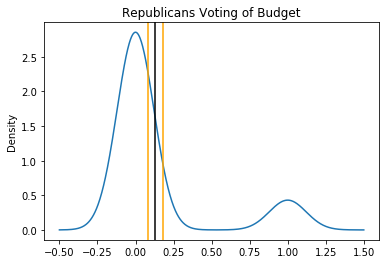

In [0]:
con_int = confidence_interval(rep.budget)

rep.budget.plot.density()
plt.title("Republicans Voting of Budget")
plt.axvline(x=con_int[0], color='orange')
plt.axvline(x=con_int[1], color='black')
plt.axvline(x=con_int[2], color='orange');
plt.show()

So for me, my biggest understanding for the difference between $baysian$ and $frequencist$ thinking is that frequencist can only work off the sample they are given. While baysian works off the data they receive and constantly rework their thinking on a statistic. For example, with driving drunk, if we used the frequencist thinking, we would assume based on the sample we had, that they were not a drunk. But with baysian, after running the test four times, we realize that they are in fact more likely to be a drunk. 

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!